In [31]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from collections import Counter
from sklearn.metrics import (
    roc_auc_score, roc_curve, precision_score, recall_score,
    f1_score, accuracy_score, classification_report
)
from sklearn import preprocessing, linear_model, svm
from sklearn.model_selection import (
    train_test_split, KFold, GridSearchCV, StratifiedKFold
)
from sklearn.manifold import TSNE
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import xgboost as xgb
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss

warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
column_list = (list(df.columns))
print(column_list)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [4]:
# Display the data types of the columns in the data frame
print("=============================================")
print("Column data types:")
print(df.dtypes)
print("=============================================")

# Display the shape of the data frame
print("=============================================")
print("Data frame shape:", df.shape)
print("=============================================")

# Display information about the data frame
print("=============================================")
df.info()
print("=============================================")

# Display the first few rows of the data frame
print("First few rows of the data frame:")
print(df.head())


Column data types:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
Data frame shape: (284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 

In [5]:
# Checking for missing values in each column
missing_total = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)

# Combine the missing total and percent into a single DataFrame
missing_info = pd.concat([missing_total, missing_percent], axis=1, keys=['Total Missing', 'Percent Missing'])

# Display the combined information
print(missing_info)


        Total Missing  Percent Missing
Time                0              0.0
V16                 0              0.0
Amount              0              0.0
V28                 0              0.0
V27                 0              0.0
V26                 0              0.0
V25                 0              0.0
V24                 0              0.0
V23                 0              0.0
V22                 0              0.0
V21                 0              0.0
V20                 0              0.0
V19                 0              0.0
V18                 0              0.0
V17                 0              0.0
V15                 0              0.0
V1                  0              0.0
V14                 0              0.0
V13                 0              0.0
V12                 0              0.0
V11                 0              0.0
V10                 0              0.0
V9                  0              0.0
V8                  0              0.0
V7                  0    

In [6]:
# Calculate the number of transactions for each class
classes = df['Class'].value_counts()

# Calculate the percentage of each class
normal_share = round(classes[0] / df['Class'].count() * 100, 2)
fraud_share = round(classes[1] / df['Class'].count() * 100, 2)

# Print the percentage of Non-Fraudulent and Fraudulent transactions
print("Non-Fraudulent: {} %".format(normal_share))
print("    Fraudulent: {} %".format(fraud_share))

print("==============================================")

# Calculate the imbalance percentage
imbalance = (fraud_share / normal_share) * 100

# Print the calculated values
print('Normal Share:', normal_share)
print('Fraud Share:', fraud_share)
print('Imbalance Percentage:', imbalance)
print("==============================================")


Non-Fraudulent: 99.83 %
    Fraudulent: 0.17 %
Normal Share: 99.83
Fraud Share: 0.17
Imbalance Percentage: 0.17028949213663228


<Figure size 1440x432 with 0 Axes>

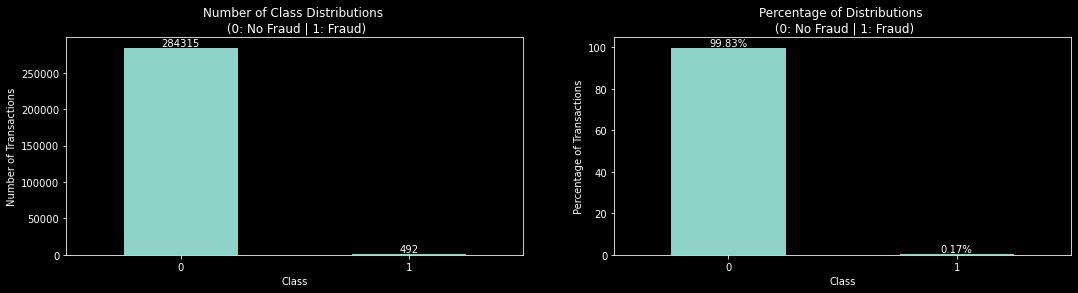

In [7]:
import matplotlib.pyplot as plt

with plt.style.context('dark_background'):
    plt.figure(figsize=(20, 6), facecolor='m')

    fig, ax = plt.subplots(1, 2, figsize=(18, 4))

    classes.plot(kind='bar', rot=0, ax=ax[0])
    ax[0].set_title('Number of Class Distributions \n (0: No Fraud | 1: Fraud)')
    ax[0].set_ylabel('Number of Transactions')
    ax[0].set_xlabel('Class')
    
    for i in ax[0].containers:
        ax[0].bar_label(i, label_type='edge', labels=i.datavalues.astype(int))

    (classes / df['Class'].count() * 100).plot(kind='bar', rot=0, ax=ax[1])
    ax[1].set_title('Percentage of Distributions \n (0: No Fraud | 1: Fraud)')
    ax[1].set_ylabel('Percentage of Transactions')
    ax[1].set_xlabel('Class')
    
    for i in ax[1].containers:
        ax[1].bar_label(i, label_type='edge', labels=[f'{val:.2f}%' for val in i.datavalues])

    plt.show()


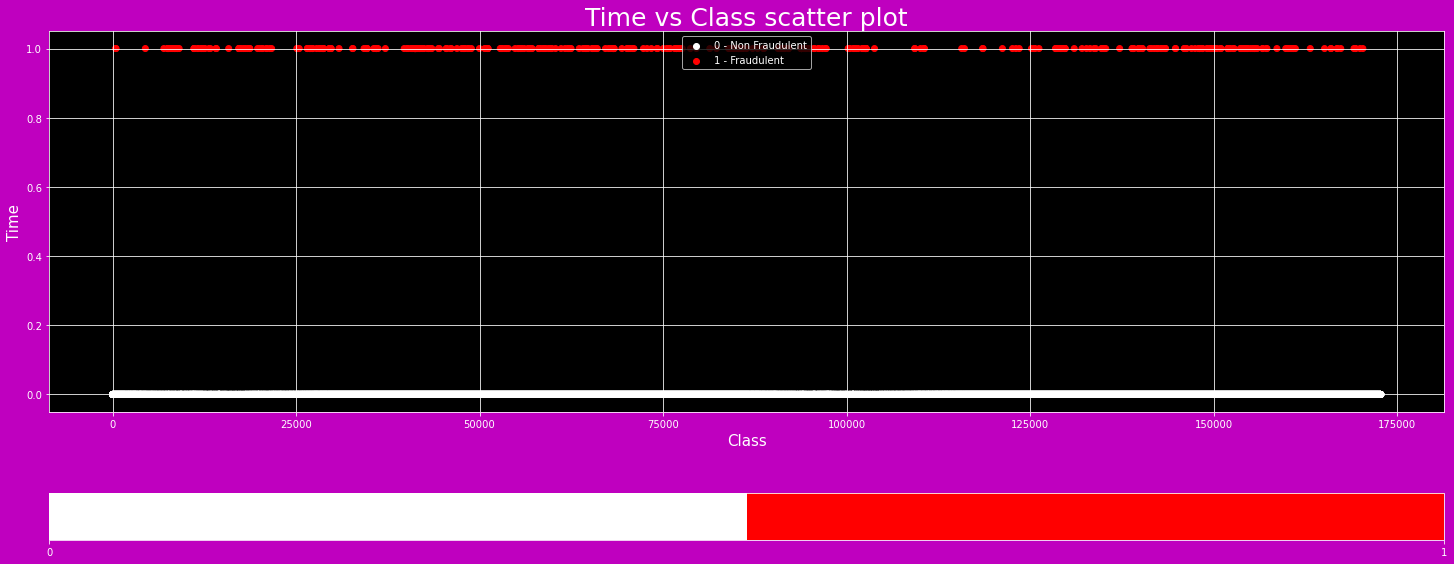

In [8]:
import matplotlib.pyplot as plt
from matplotlib import colors

def plot_time_vs_class(df):
    """
    Creates a scatter plot of Time vs Class with color-coded points and a legend.

    Parameters:
    -----------
    df : pandas DataFrame
        The DataFrame containing the data to be plotted.

    Returns:
    --------
    None
    """
    cmap = colors.ListedColormap(['white', 'red'])

    with plt.style.context('dark_background'):
        plt.figure(figsize=(25, 10), facecolor='m')

        # Use the cmap parameter to color-code the points
        plt.scatter(x=df["Time"], y=df["Class"], c=df["Class"], cmap=cmap)

        # Set the limits of the colorbar
        plt.colorbar(ticks=[0, 1], orientation='horizontal', aspect=30, pad=0.15)

        plt.title("Time vs Class scatter plot", fontsize=25)
        plt.xlabel("Class", fontsize=15)
        plt.ylabel("Time", fontsize=15)
        plt.grid()

        # Create a legend with the two class labels
        legend_elements = [
            plt.scatter([], [], marker='o', color='white', label='0 - Non Fraudulent'),
            plt.scatter([], [], marker='o', color='red', label='1 - Fraudulent')
        ]
        plt.legend(handles=legend_elements, loc='upper center')

        plt.show()

# Call the function with your DataFrame
plot_time_vs_class(df)


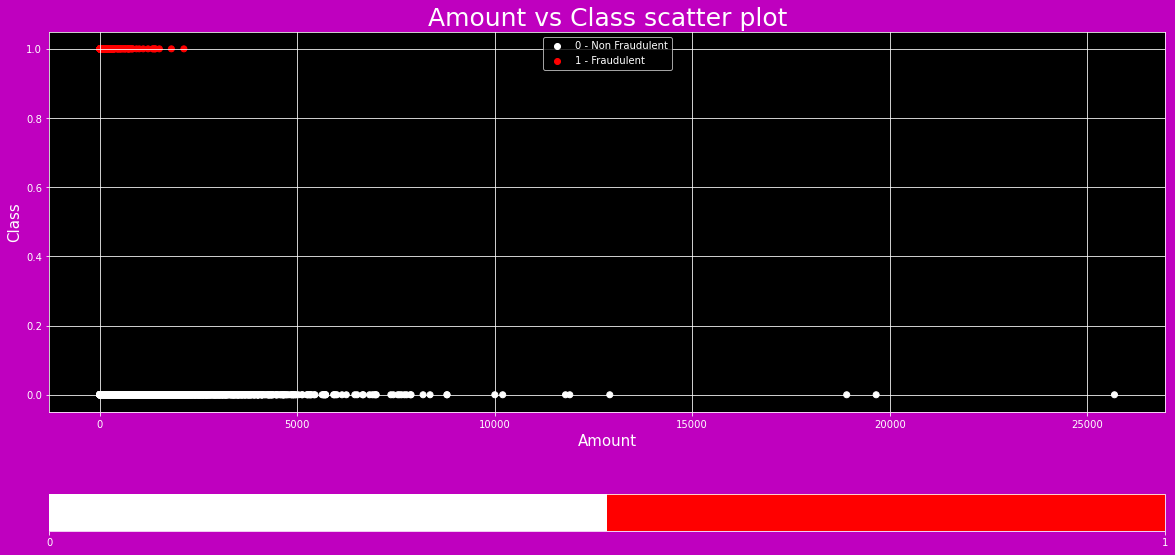

In [9]:
cmap = colors.ListedColormap(['white', 'red'])

with plt.style.context('dark_background'):
    plt.figure(figsize=(20,10), facecolor='m')

    # Create a scatter plot with color-coded points based on Class
    plt.scatter(x=df["Amount"], y=df["Class"], c=df["Class"], cmap=cmap)

    # Set the limits of the colorbar
    plt.colorbar(ticks=[0, 1], orientation='horizontal', aspect=30, pad=0.15)

    plt.title("Amount vs Class scatter plot", fontsize=25)
    plt.ylabel("Class", fontsize=15)
    plt.xlabel("Amount", fontsize=15)
    plt.grid()

    # Create a legend with the class labels
    legend_elements = [plt.scatter([], [], marker='o', color='white', label='0 - Non Fraudulent'),
                       plt.scatter([], [], marker='o', color='red', label='1 - Fraudulent')]
    plt.legend(handles=legend_elements, loc='upper center')

    plt.show()


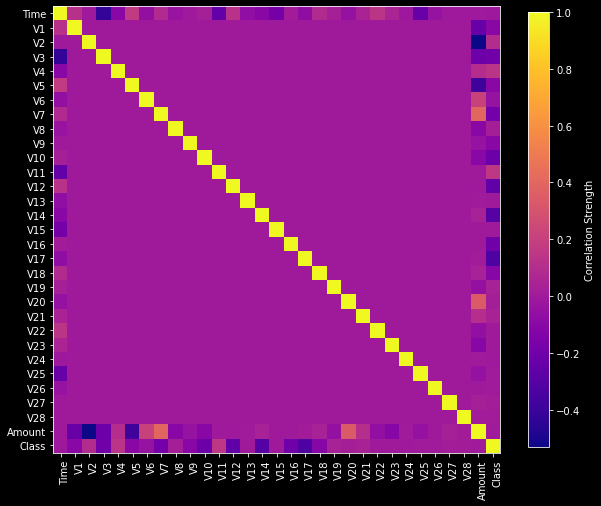

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def corrplot(data):
    """
    Create a correlation plot of the input DataFrame.

    Parameters:
    -----------
    data : pandas DataFrame
        The DataFrame containing the data to be plotted.

    Returns:
    --------
    None

    Notes:
    ------
    This function uses the matplotlib library to create a correlation plot of the input DataFrame. The correlation 
    matrix is calculated using data.corr() and then plotted using imshow() function. The colormap 'plasma' is used
    to represent the correlation values.

    The size of the figure is set using plt.subplots with a figsize parameter of (10, 10). The x and y tick labels are 
    set to the columns of the DataFrame using ax.set_xticklabels and ax.set_yticklabels. The x tick labels are rotated
    by 90 degrees for better readability using the rotation parameter. 

    The colorbar is created using plt.colorbar with the aspect, shrink, and pad parameters set to 20, 0.80, and 0.05,
    respectively, to adjust the position and size of the colorbar. The label for the colorbar can be adjusted using
    the label parameter.

    Finally, the plot is displayed using plt.show.
    """
    with plt.style.context('dark_background'):
        corr = data.corr()
        fig, ax = plt.subplots(figsize=(10, 10))
        im = ax.imshow(corr, cmap='plasma')
        ax.set_xticks(np.arange(len(data.columns)))
        ax.set_yticks(np.arange(len(data.columns)))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticklabels(data.columns)
        plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")
        cbar = plt.colorbar(im, aspect=20, shrink=0.80, pad=0.05)
        cbar.set_label('Correlation Strength')
        plt.show()

# Plotting the correlation matrix using the defined function
corrplot(df)


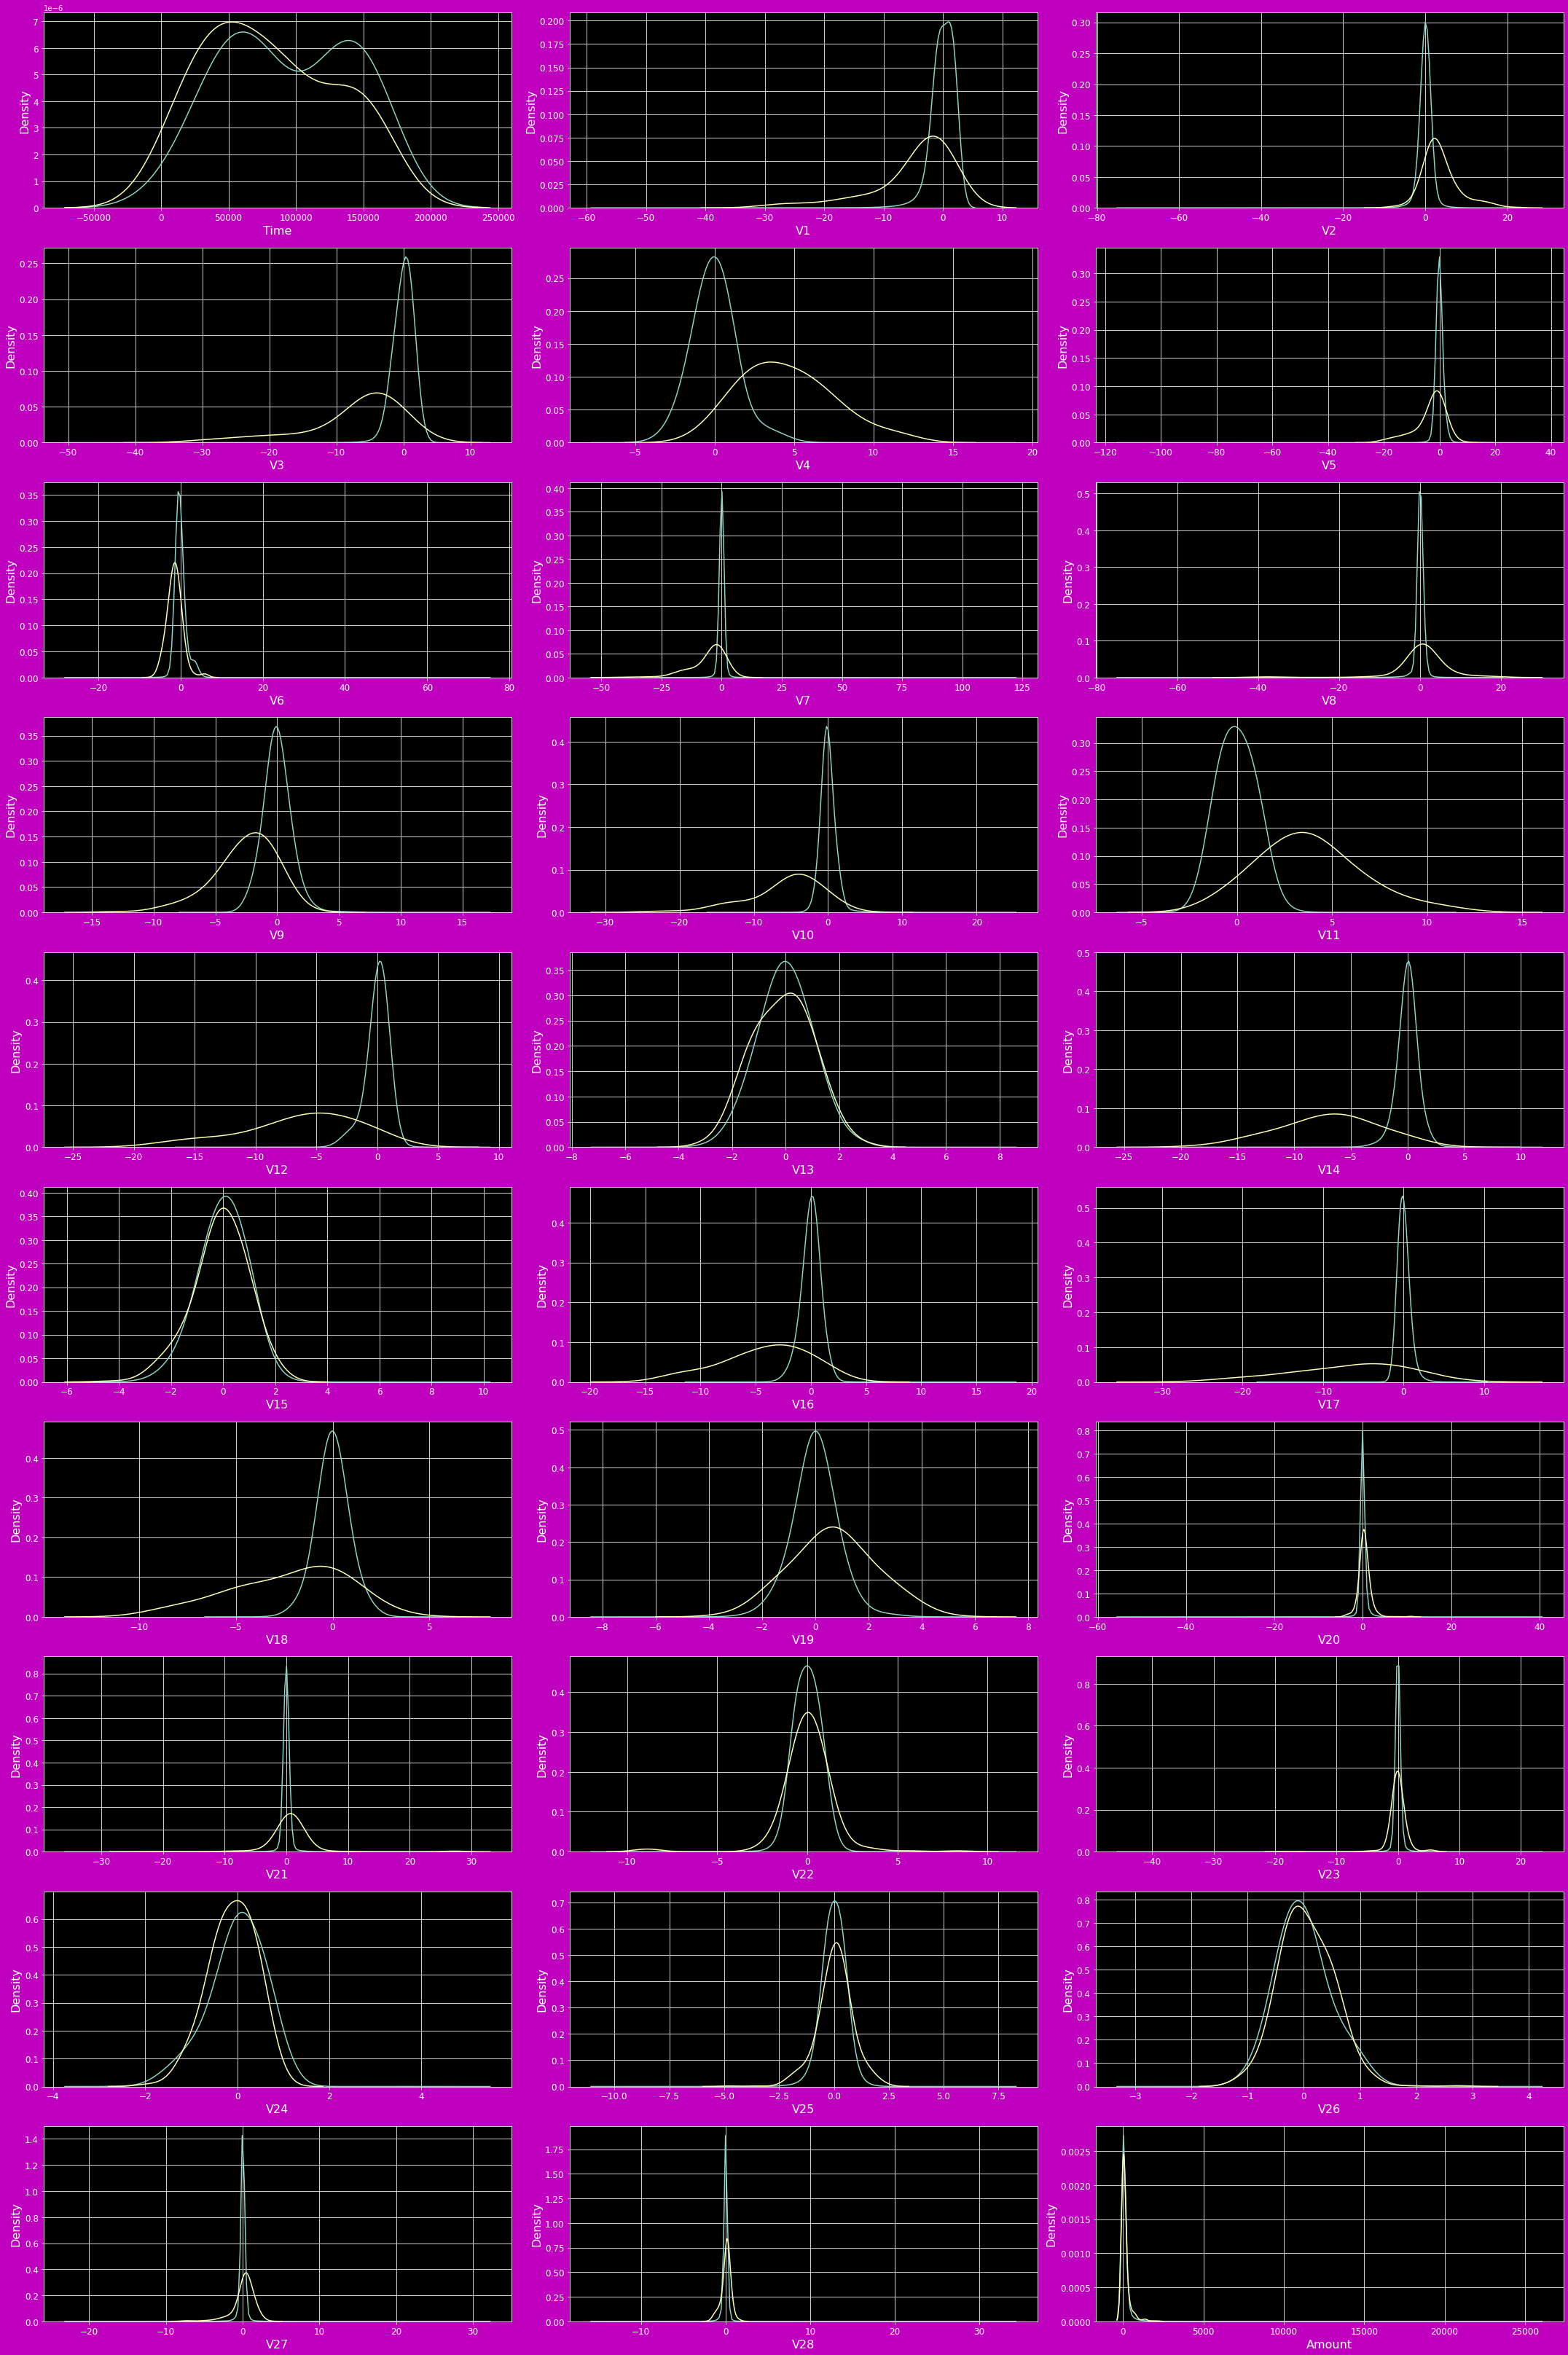

In [11]:
import seaborn as sns

def visualize_variable_distribution(df):
    """
    Visualize the distribution of variables in a DataFrame using density plots.

    Parameters:
    -----------
    df : pandas DataFrame
        The DataFrame containing the variables to be visualized.

    Returns:
    --------
    None

    Notes:
    ------
    This function creates a grid of density plots using seaborn's kdeplot() function. The grid is structured as 10 rows
    and 3 columns to accommodate all the variables in the input DataFrame. The Class column is excluded from the list
    of variables to be plotted.

    The data is first separated by Class into two subsets, t0 and t1, using the loc() method on the DataFrame. The
    subsets are then plotted using kdeplot() with a bandwidth of 0.5 to estimate the density function. The two subsets
    are distinguished by different colors.

    The x-axis labels for each plot are set to the name of the corresponding variable using plt.xlabel(). The x-axis
    ticks are adjusted using plt.xticks() to better fit the labels. The tick labels and font size can be adjusted using
    plt.tick_params().

    The grid is displayed using plt.show().
    """
    var = list(df.columns.values)
    # Dropping 'Class' column from the list of variables
    var.remove("Class")

    t0 = df.loc[df['Class'] == 0]
    t1 = df.loc[df['Class'] == 1]

    with plt.style.context('dark_background'):
        plt.figure(figsize=(30, 45), facecolor='m')
        i = 1
        for feature in var:
            plt.subplot(10, 3, i)
            sns.kdeplot(t0[feature], bw=0.5, label="0")
            sns.kdeplot(t1[feature], bw=0.5, label="1")
            plt.xlabel(feature, fontsize=16)
            plt.ylabel("Density", fontsize=16)
            plt.xticks(fontsize=12)
            plt.yticks(fontsize=12)
            plt.grid()
            i += 1
        plt.tight_layout()
        plt.show()

# Call the function to visualize variable distribution
visualize_variable_distribution(df)


In [12]:
# Drop the 'Time' column from the DataFrame
df = df.drop("Time", axis=1)
df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
# Assign the 'Class' column as the target variable y
y = df["Class"]

# Create the feature matrix X by dropping the 'Class' column
X = df.drop("Class", axis=1)

# Print the shapes of y and X
print("Shape of y:", y.shape)
print("Shape of X:", X.shape)


Shape of y: (284807,)
Shape of X: (284807, 29)


In [14]:
from sklearn.model_selection import train_test_split

# Splitting the data into 80:20 train test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (227845, 29)
Shape of X_test: (56962, 29)
Shape of y_train: (227845,)
Shape of y_test: (56962,)


In [15]:
print("Fraudulent Count for Full data:", np.sum(y))
print("Fraudulent Count for Train data:", np.sum(y_train))
print("Fraudulent Count for Test data:", np.sum(y_test))


Fraudulent Count for Full data: 492
Fraudulent Count for Train data: 394
Fraudulent Count for Test data: 98


In [16]:
X_test_saved = X_test.copy()
y_test_saved = y_test.copy()
print("Testing set saved for evaluation.")


Testing set saved for evaluation.


In [17]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()

# Scaling the "Amount" feature in the training data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Scaling the "Amount" feature in the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])


In [18]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,...,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.204315
180305,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,...,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.264579
42664,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,...,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,2.130828
198723,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,...,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.221294
82325,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,...,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,0.892136


In [19]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,...,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,0.013918
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,...,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,-0.141267
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,...,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,0.752540
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,...,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,-0.292415
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,...,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,-0.285317


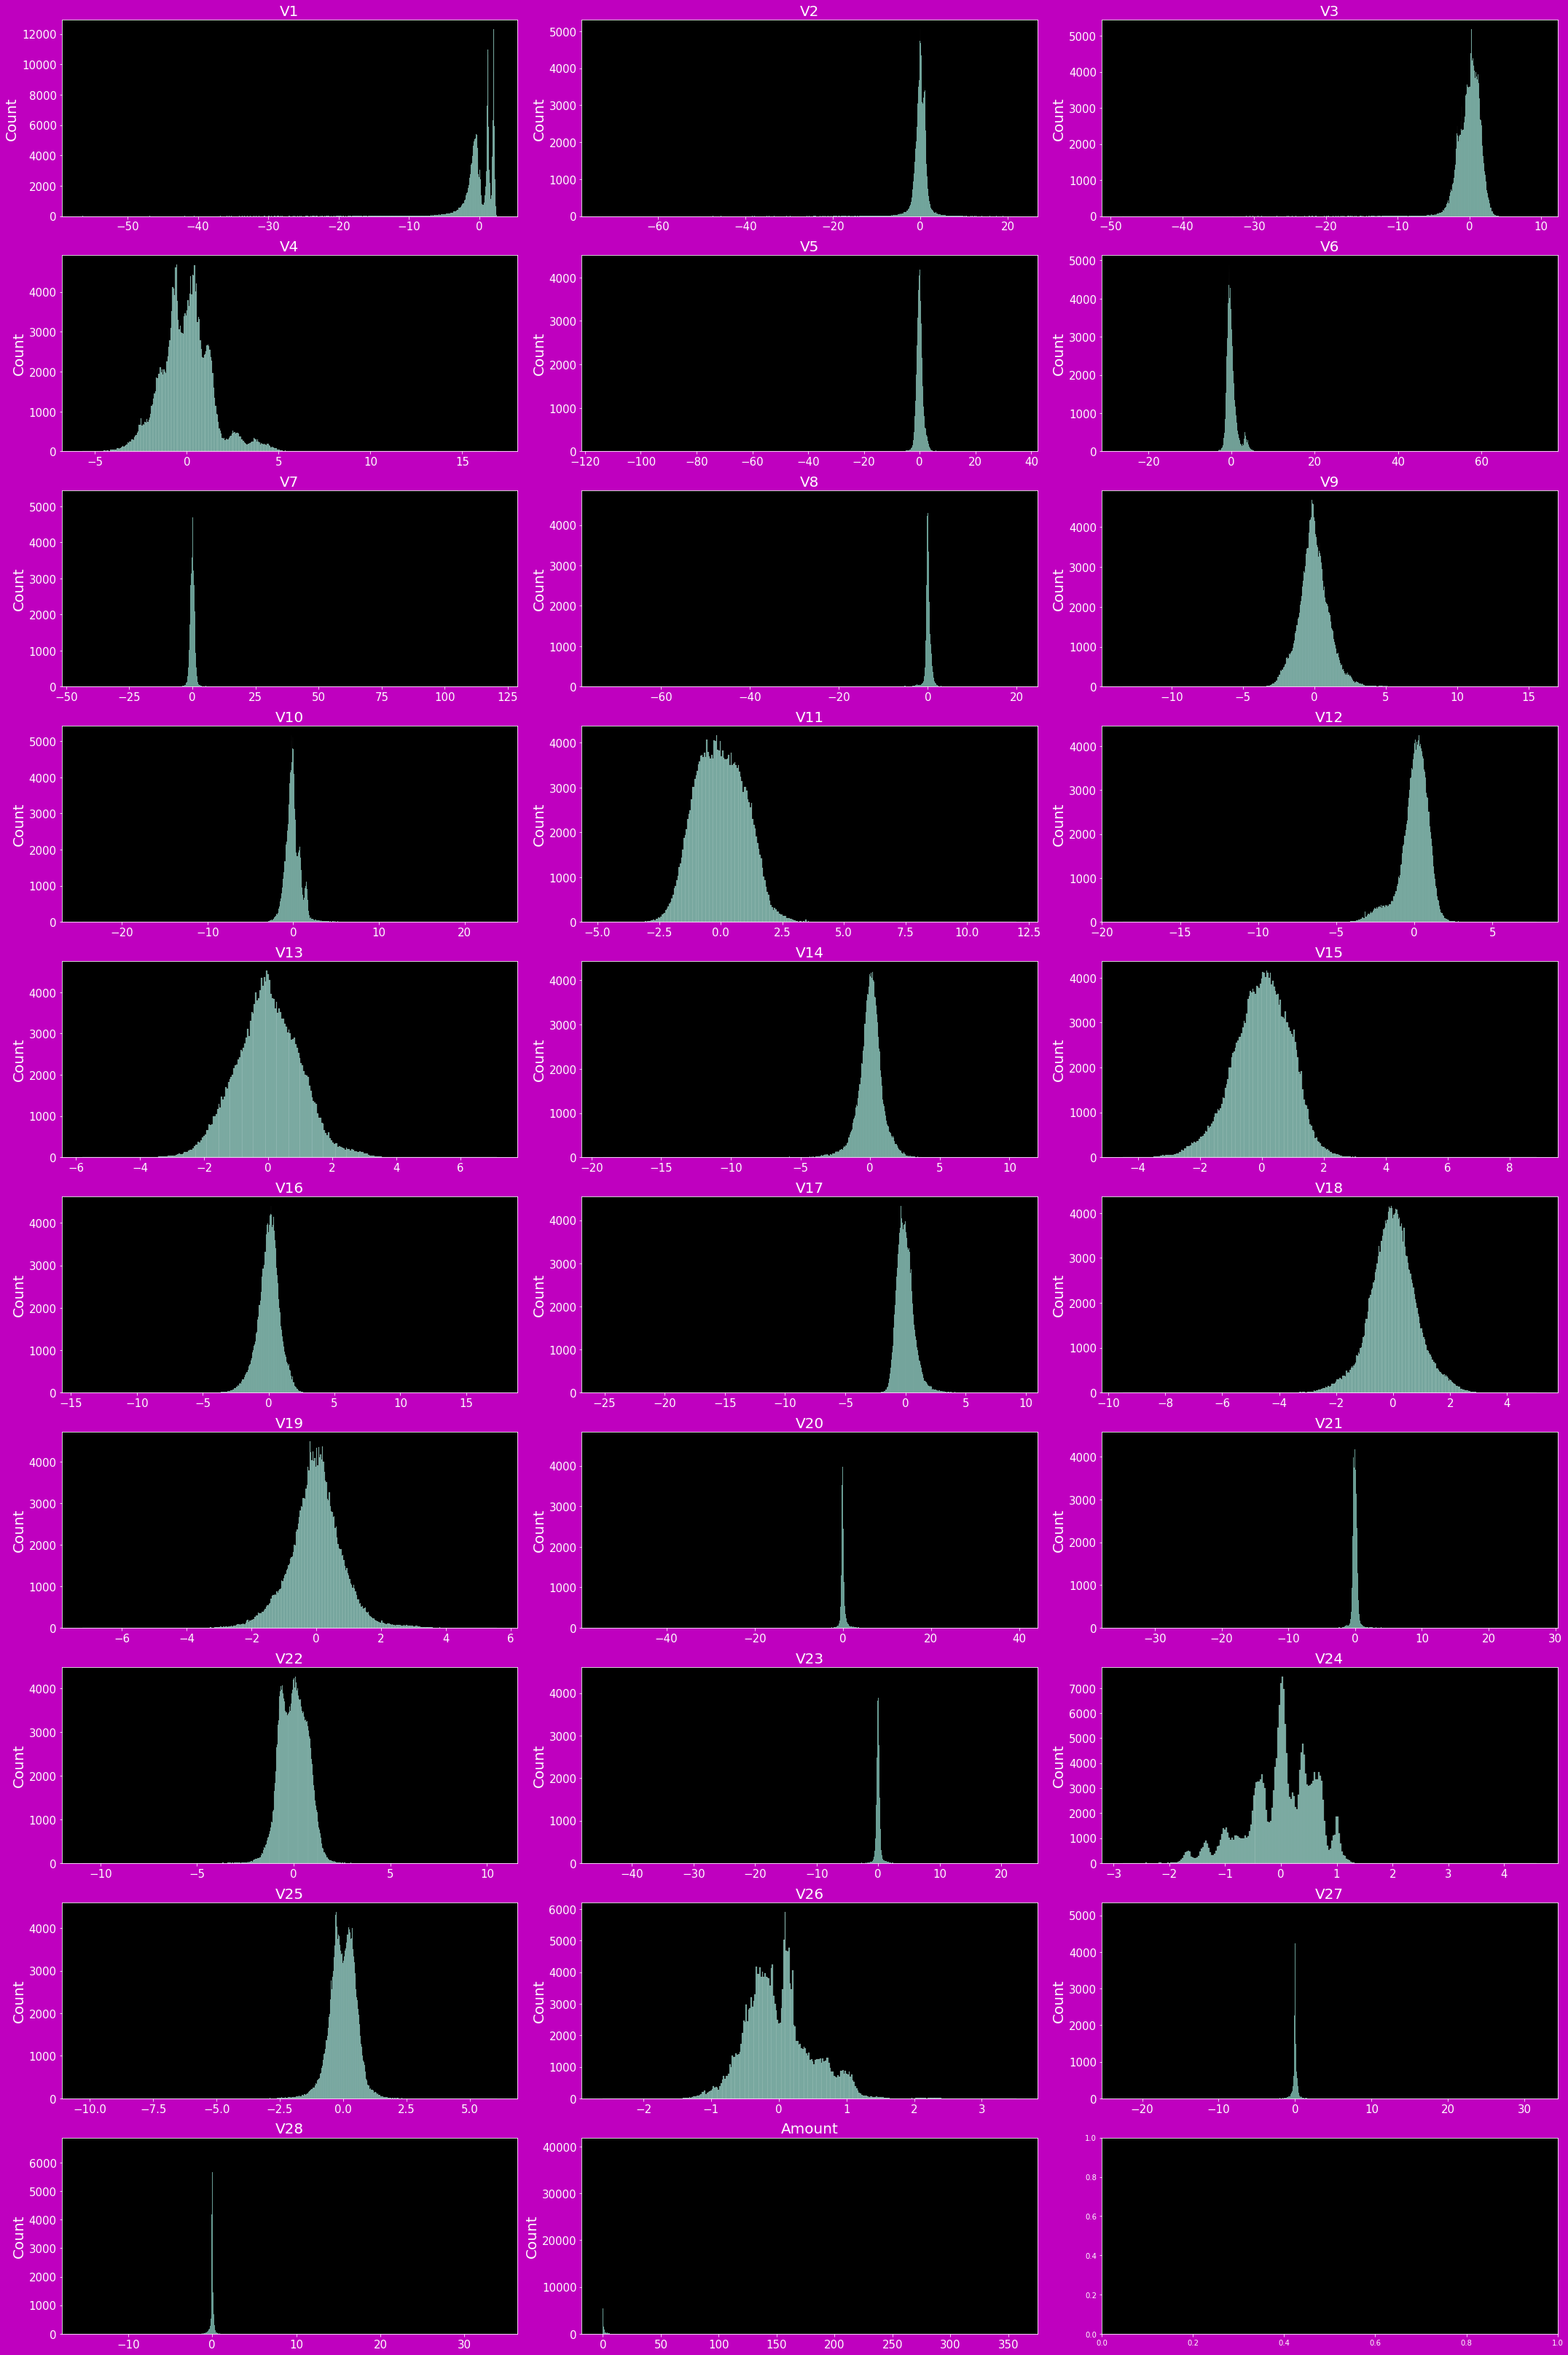

In [20]:
def plot_histograms(X_train):
    var = X_train.columns

    with plt.style.context('dark_background'):
        fig, axes = plt.subplots(10, 3, figsize=(30, 45), facecolor='m')
        axes = axes.flatten()

        for i, ax in enumerate(axes):
            if i < len(var):
                sns.histplot(X_train[var[i]], ax=ax)
                ax.set_title(var[i], fontsize=20)
                ax.set_ylabel("Count", fontsize=20)
                ax.tick_params(axis='both', labelsize=15)
                ax.set_xlabel('')

        plt.tight_layout()
        plt.show()

# Call the function with X_train as an argument
plot_histograms(X_train)


In [21]:
# Calculate skewness of features
var = X_train.columns
skewness_list = []
for col in var:
    skewness_list.append(X_train[col].skew())

# Create a DataFrame to store skewness values
skewness_df = pd.DataFrame({"Features": var, "Skewness": skewness_list})
skewness_df.set_index("Features", inplace=True)
skewness_df

# Identify skewed features
skewed_features = skewness_df[(skewness_df["Skewness"] > 1) | (skewness_df["Skewness"] < -1)].index
skewed_features.tolist()


['V1',
 'V2',
 'V3',
 'V5',
 'V6',
 'V7',
 'V8',
 'V10',
 'V12',
 'V14',
 'V16',
 'V17',
 'V20',
 'V21',
 'V23',
 'V28',
 'Amount']

In [22]:
# Importing the required library
from sklearn import preprocessing

# Instantiate the PowerTransformer
pt = preprocessing.PowerTransformer(method='yeo-johnson', copy=True)

# Fit and transform the training data
X_train_pt = pt.fit_transform(X_train)
y_train_pt = y_train

# Transform the test data using the same transformer
X_test_pt = pt.transform(X_test)
y_test_pt = y_test


In [23]:
print(X_train_pt.shape)
print(y_train_pt.shape)

(227845, 29)
(227845,)


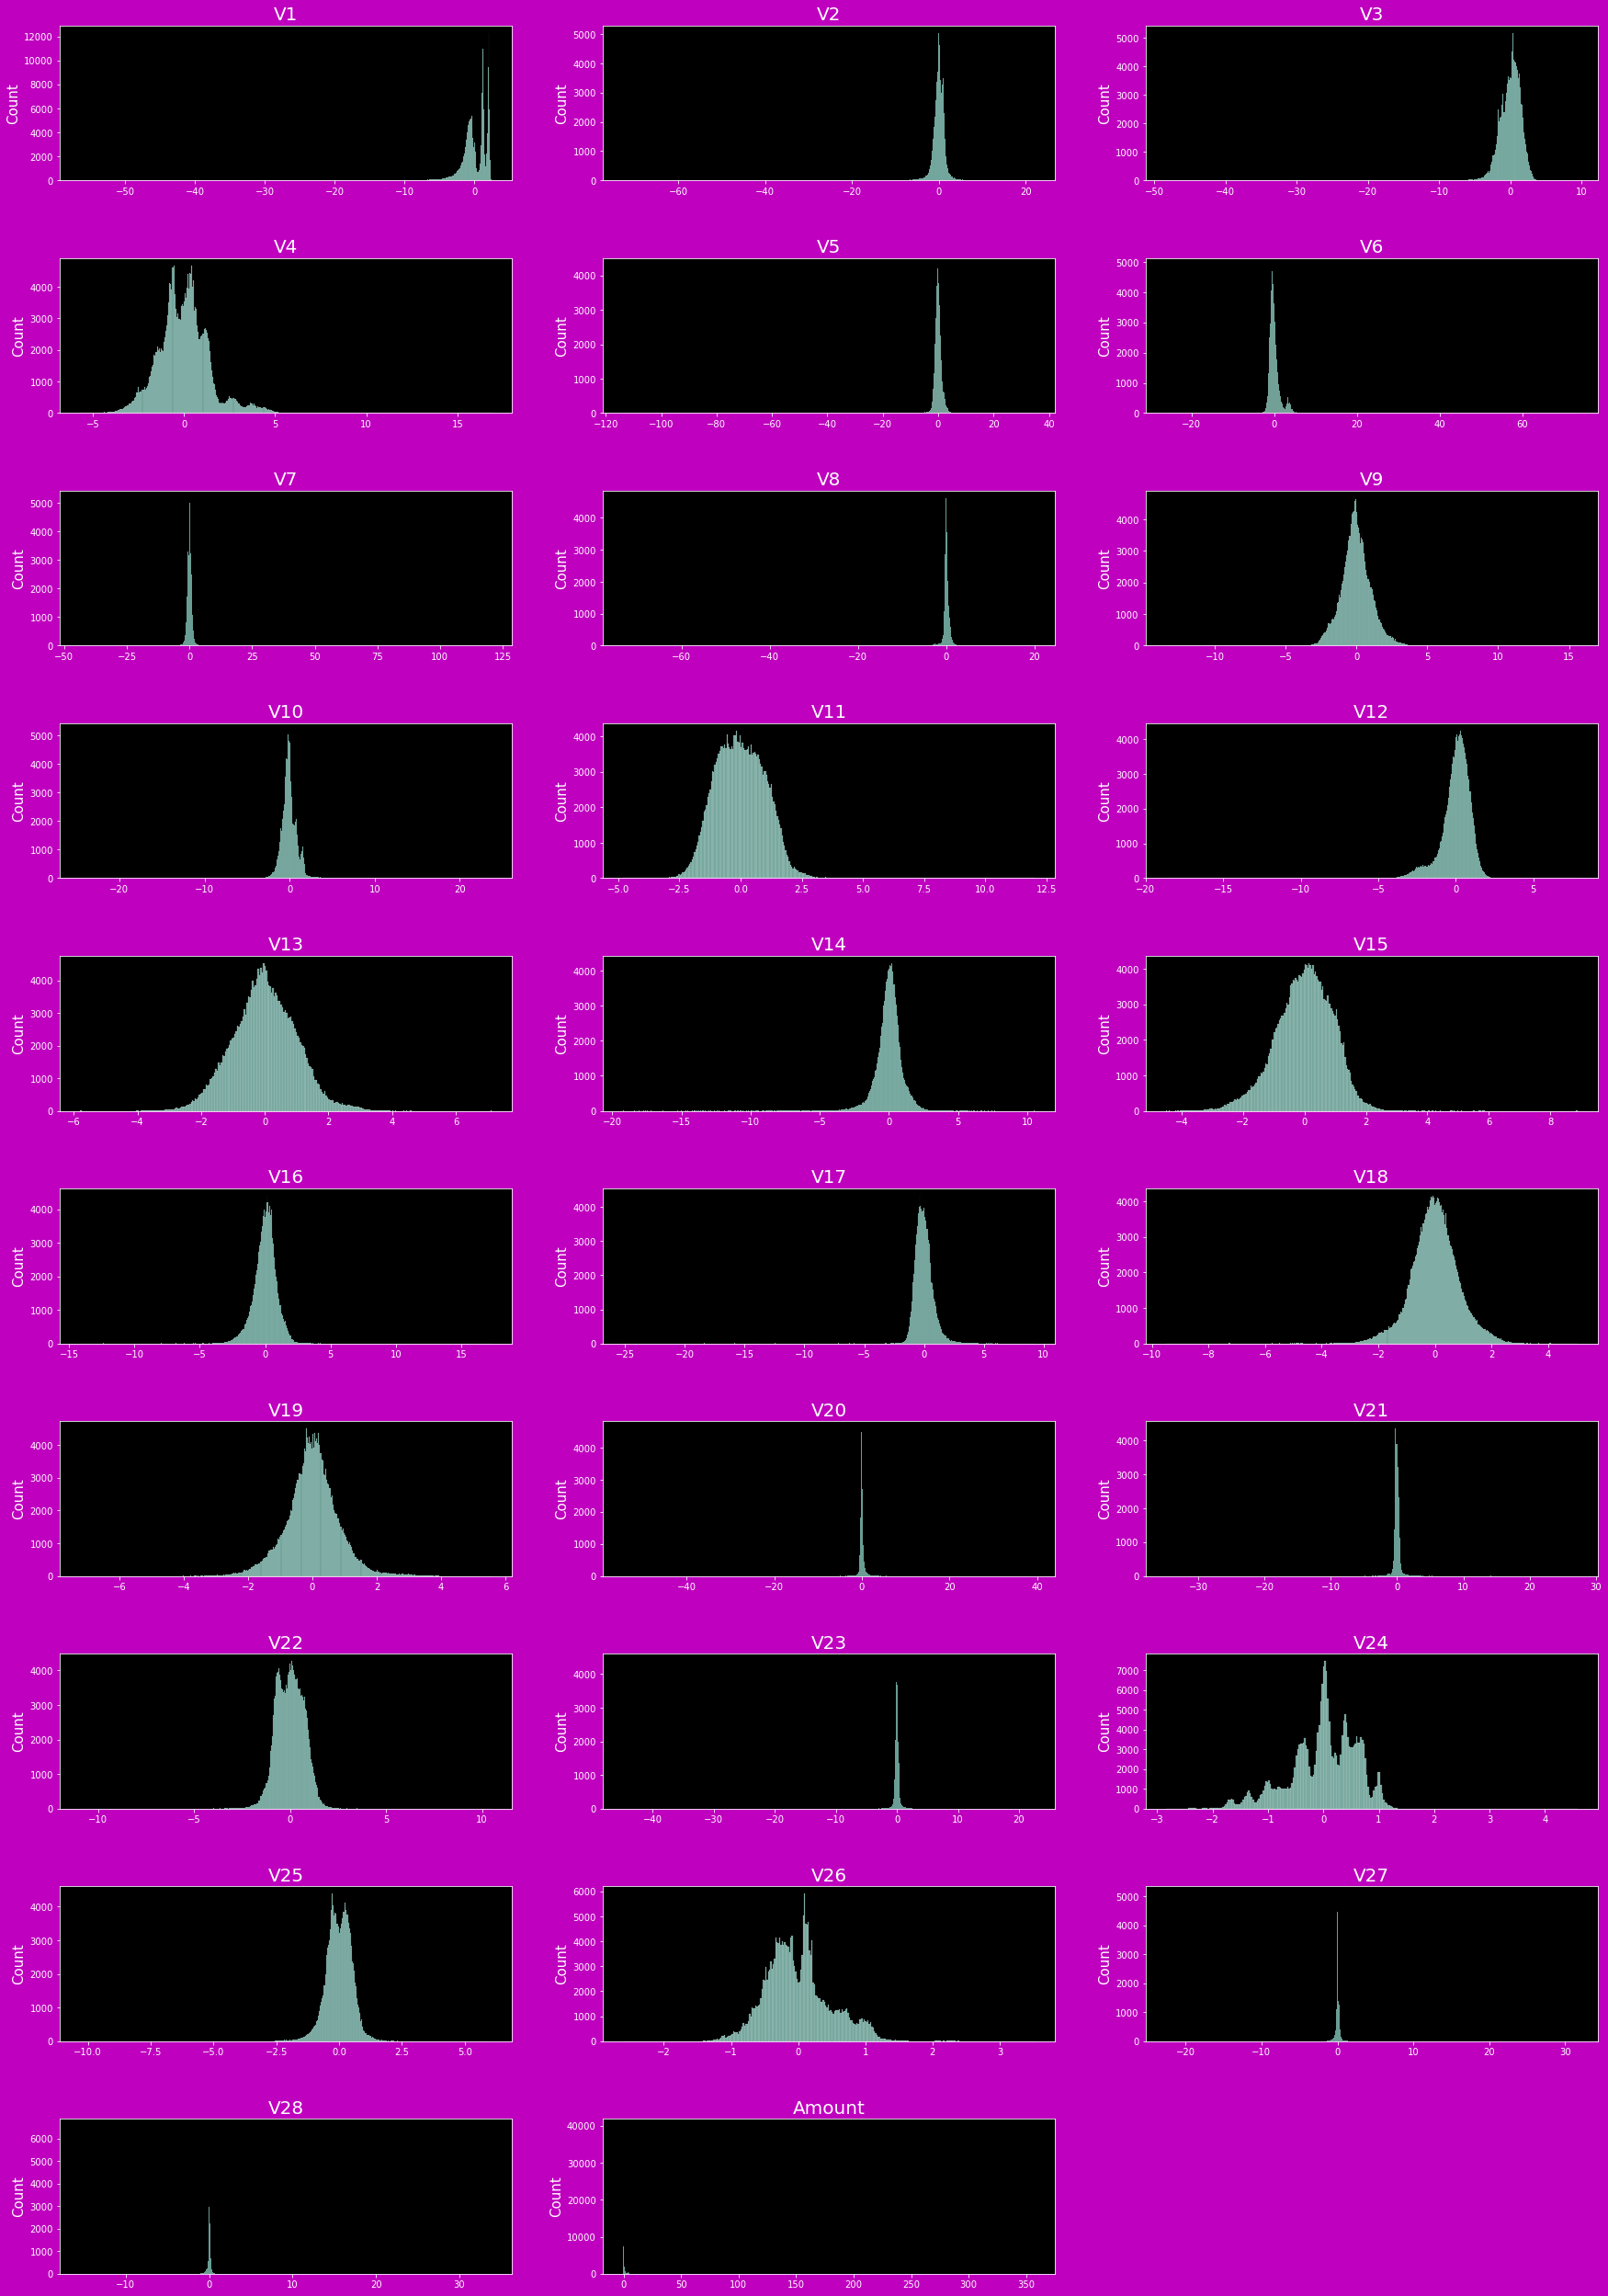

In [24]:
import matplotlib.pyplot as plt

# Get the list of variable names
var = X_train.columns

# Set the style and create the figure
with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(30, 45), facecolor='m')

    # Iterate through variables
    i = 0
    for col in var:
        i += 1
        ax = fig.add_subplot(10, 3, i)  # create subplot
        sns.histplot(X_train[col], ax=ax)  # plot histogram
        ax.set_title(col, fontsize=20)  # set title of the subplot
        ax.set_ylabel('Count', fontsize=15)  # set ylabel of the subplot
        ax.set_xlabel('')  # set empty string as x label of the subplot

    # Adjust spacing between subplots
    fig.subplots_adjust(hspace=0.5, wspace=0.2)

    # Show the plot
    plt.show()


In [34]:
# Create an instance of SMOTE
smote = SMOTE(random_state=0)

# Apply SMOTE to the training data
X_smote_train_pt, y_smote_train_pt = smote.fit_resample(X_train_pt, y_train_pt)


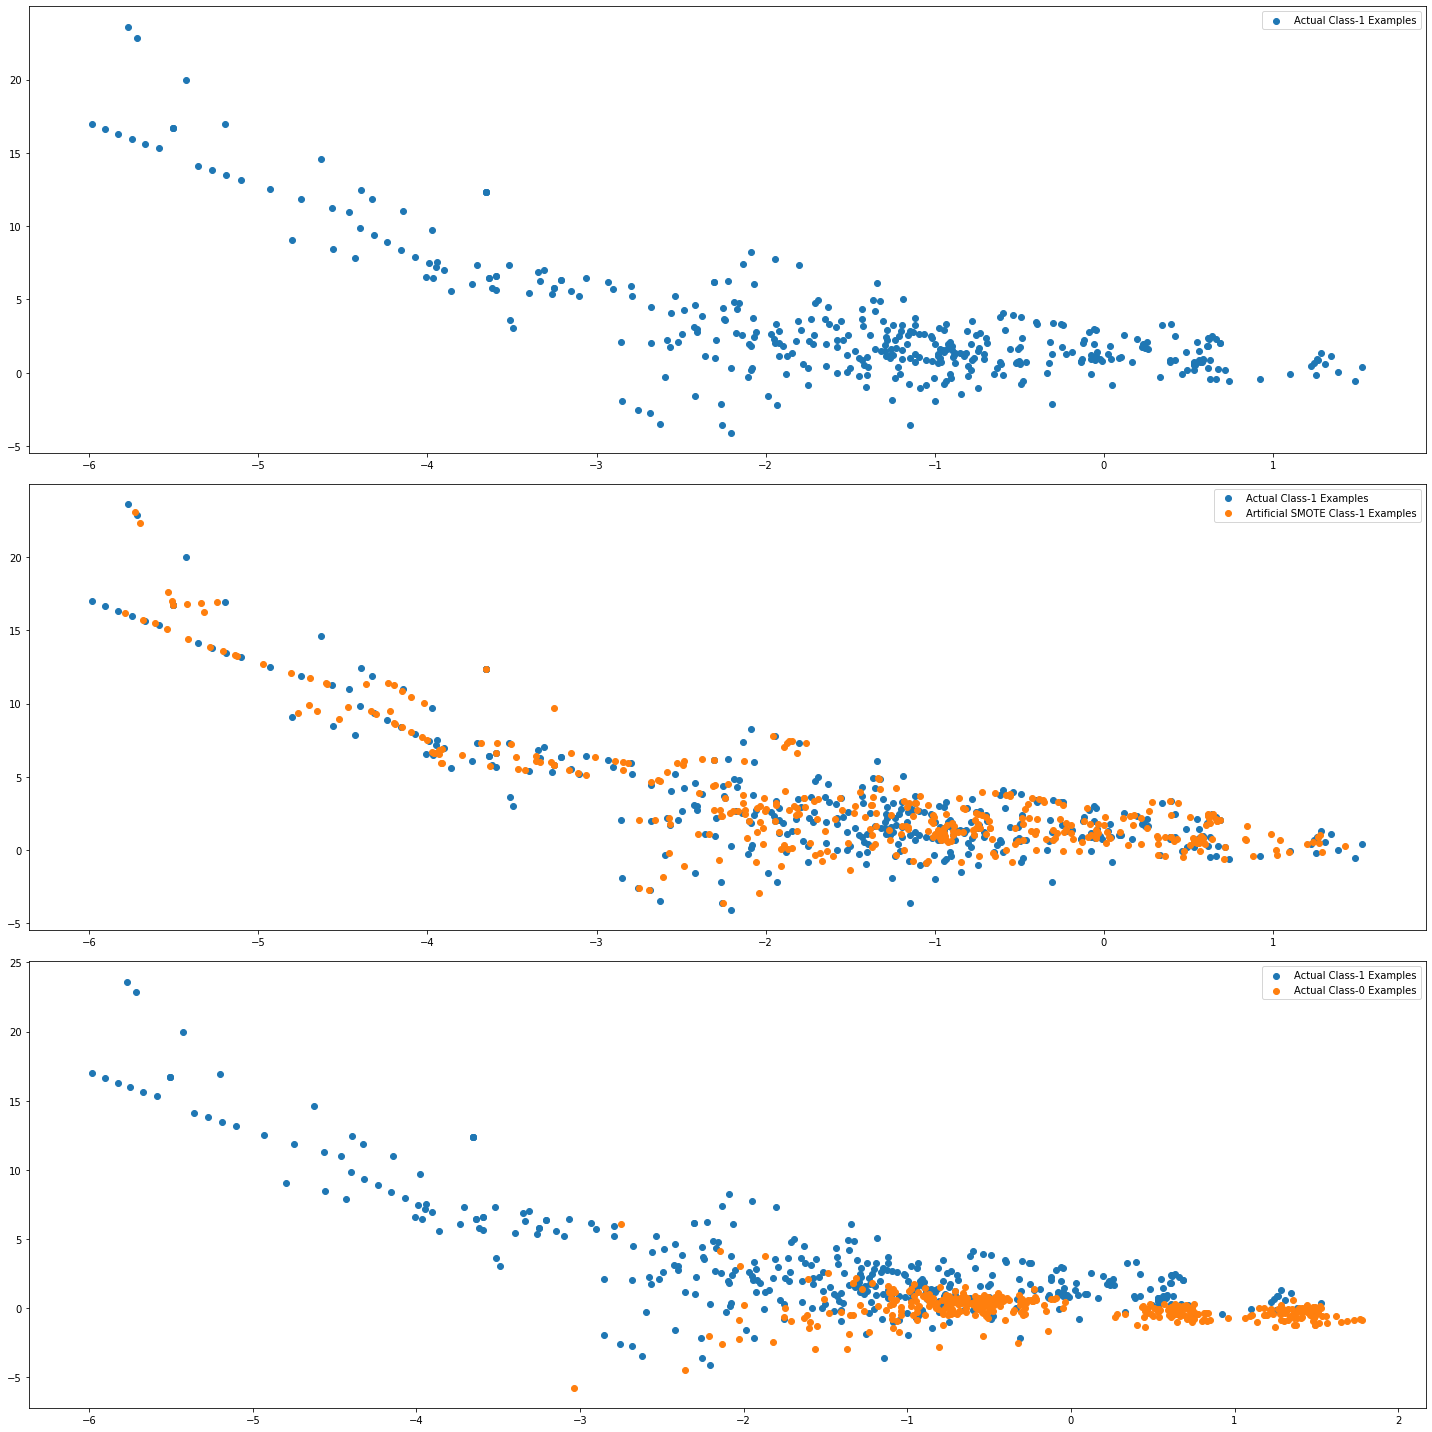

In [35]:
# Extract actual minority samples from X_train_pt based on y_train_pt
X_train_pt_1 = X_train_pt[y_train_pt == 1.0]
X_train_pt_0 = X_train_pt[y_train_pt == 0.0]

# Plotting setup
plt.rcParams['figure.figsize'] = [20, 20]
fig, axes = plt.subplots(nrows=3, ncols=1)

# Plot 1: Actual Class-1 Examples
axes[0].scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
axes[0].legend()

# Plot 2: Actual Class-1 Examples and Artificial SMOTE Class-1 Examples
axes[1].scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
axes[1].scatter(X_smote_train_pt_1[:X_train_pt_1.shape[0], 0], X_smote_train_pt_1[:X_train_pt_1.shape[0], 1],
                label='Artificial SMOTE Class-1 Examples')
axes[1].legend()

# Plot 3: Actual Class-1 Examples and Actual Class-0 Examples
axes[2].scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
axes[2].scatter(X_train_pt_0[:X_train_pt_1.shape[0], 0], X_train_pt_0[:X_train_pt_1.shape[0], 1], label='Actual Class-0 Examples')
axes[2].legend()

plt.tight_layout()
plt.show()


In [36]:
print(y_smote_train_pt.value_counts())

0    227451
1    227451
Name: Class, dtype: int64


<AxesSubplot:xlabel='Class', ylabel='count'>

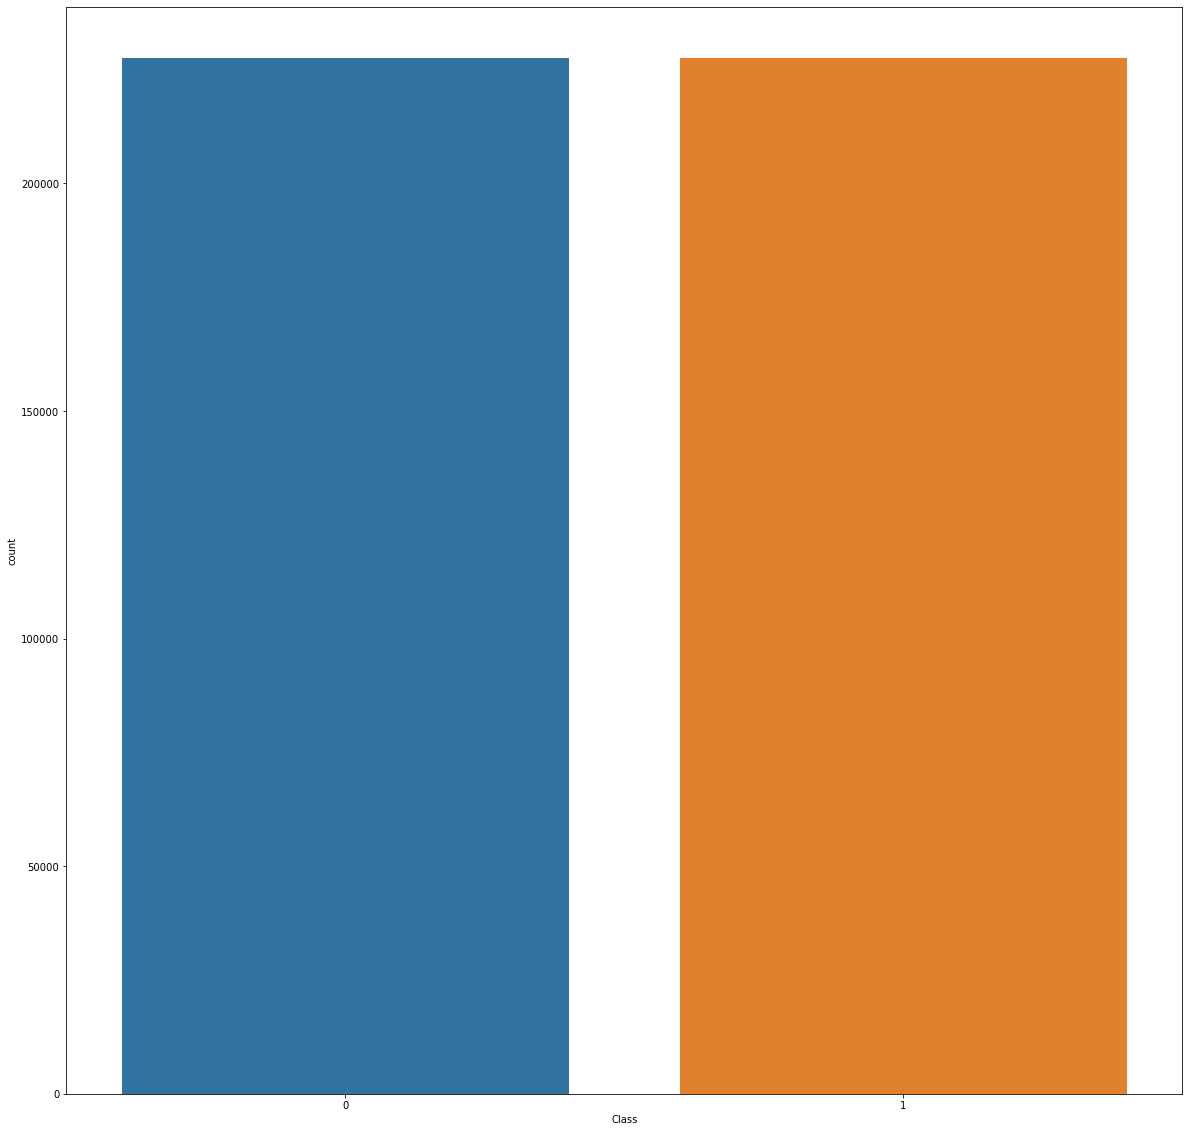

In [37]:
sns.countplot(x=y_smote_train_pt)

(array([2.00000e+00, 1.20000e+01, 6.48400e+03, 8.61800e+03, 1.85730e+04,
        2.23130e+04, 6.63820e+04, 1.69144e+05, 1.04130e+05, 5.92440e+04]),
 array([-8.47181275, -7.43814201, -6.40447126, -5.37080052, -4.33712977,
        -3.30345903, -2.26978828, -1.23611754, -0.20244679,  0.83122396,
         1.8648947 ]),
 <BarContainer object of 10 artists>)

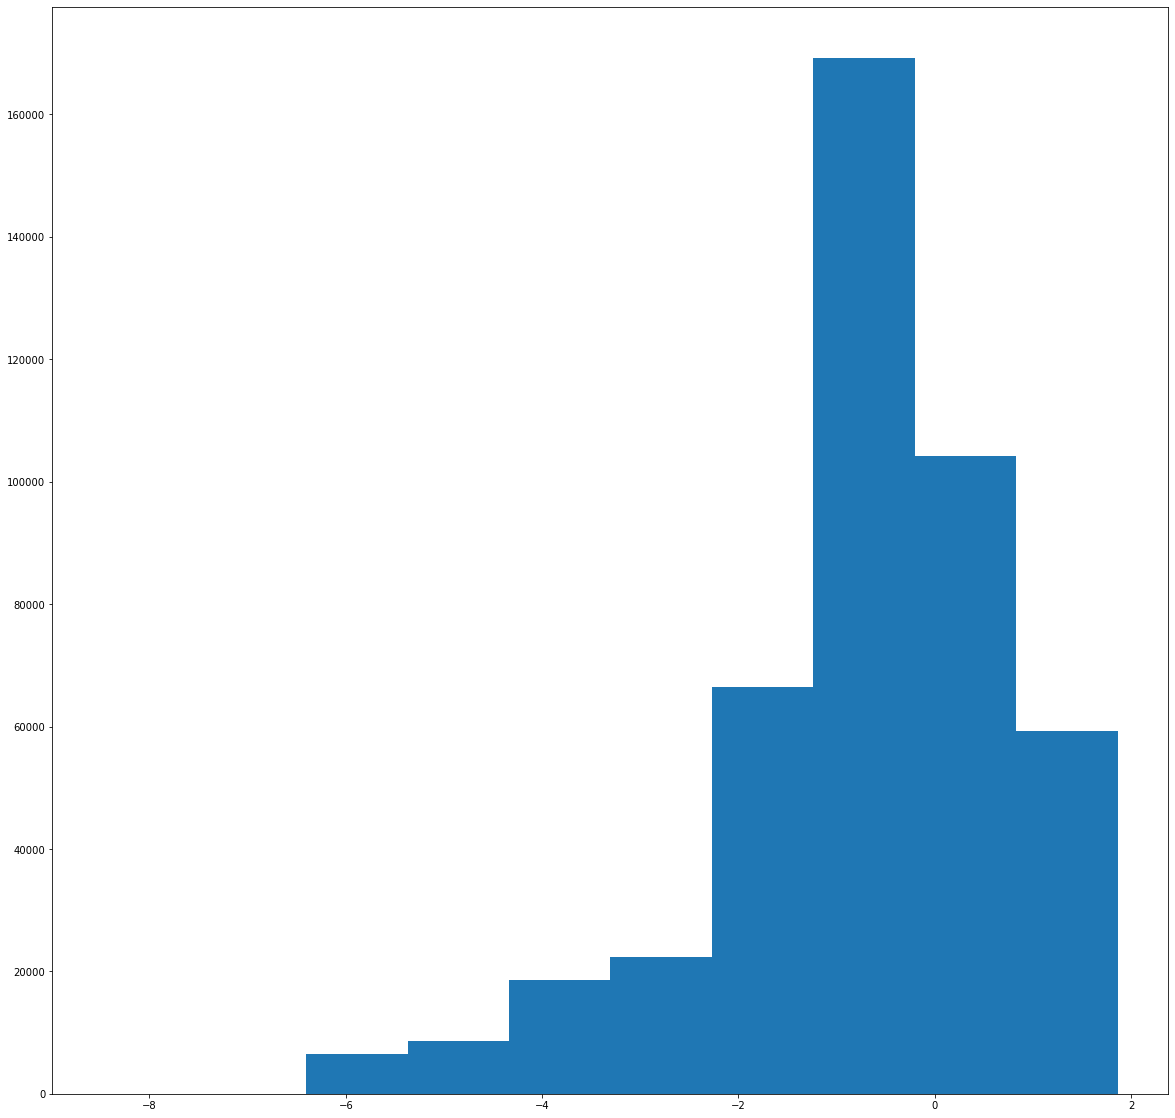

In [38]:
plt.hist(X_smote_train_pt[:,0])